In [ ]:
!pip install pandas matplotlib seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 10.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 8.4 MB/s eta 0:00:01
   ------------------------ --------------- 5.0/8.1 MB 8.4 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 8.3 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.2 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 8.4 MB/s eta 0:00:00
   -----------------------

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import os

In [9]:
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [13]:
caminho = "../data/processed/training_data.csv"
df = pd.read_csv(caminho)
print("✅ Dataset carregado:", caminho)
print(f"📊 Total de registros: {df.shape[0]} | Total de colunas: {df.shape[1]}\n")

✅ Dataset carregado: ../data/processed/training_data.csv
📊 Total de registros: 200000 | Total de colunas: 25



In [14]:
def hash_anonimo(valor, prefixo="anon"):
    if pd.isna(valor):
        return None
    return prefixo + "_" + hashlib.sha256(str(valor).encode()).hexdigest()[:8]

def anonimizar_dataframe(df):
    df = df.copy()
    
    # Nome e Documento
    if "nome_emissor" in df.columns:
        df["nome_emissor"] = ["Empresa_{:05d}".format(i) for i in range(len(df))]
    if "numero_documento" in df.columns:
        df["numero_documento"] = ["DOC{:06d}".format(i) for i in range(len(df))]
    

In [18]:
def anonimizar_dataframe(df):
    df = df.copy()

    # Nome e Documento
    if "nome_emissor" in df.columns:
        df["nome_emissor"] = ["Empresa_{:05d}".format(i) for i in range(len(df))]
    if "numero_documento" in df.columns:
        df["numero_documento"] = ["DOC{:06d}".format(i) for i in range(len(df))]

    # CPF e CNPJ
    for col in ["cpf_responsavel", "cnpj_emissor", "raiz_cnpj", "filial_cnpj", "dv_cnpj"]:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: hash_anonimo(x, prefixo=col))

    # Opcional: substituir ID
    if "id" in df.columns:
        df["id"] = [f"doc_{i:06d}" for i in range(len(df))]

    return df
df_anon = anonimizar_dataframe(df)

In [20]:
print("🔐 Dados sensíveis anonimizados com sucesso.")
print("\n📋 Info:")
print(df_anon.info())



🔐 Dados sensíveis anonimizados com sucesso.

📋 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200000 non-null  object 
 1   data_emissao        200000 non-null  object 
 2   data_vencimento     200000 non-null  object 
 3   nome_emissor        200000 non-null  object 
 4   cnpj_emissor        200000 non-null  object 
 5   raiz_cnpj           200000 non-null  object 
 6   filial_cnpj         200000 non-null  object 
 7   dv_cnpj             200000 non-null  object 
 8   cpf_responsavel     200000 non-null  object 
 9   numero_documento    200000 non-null  object 
 10  valor_total         200000 non-null  float64
 11  moeda               200000 non-null  object 
 12  tipo_documento      200000 non-null  object 
 13  classificacao       200000 non-null  object 
 14  categoria           200000 non-

In [22]:
print("\n🔍 Primeiras linhas:")
print(df_anon.head())

print("\n📊 Estatísticas descritivas:")
print(df_anon.describe())



🔍 Primeiras linhas:
           id data_emissao data_vencimento   nome_emissor  \
0  doc_000000   2024-11-08      2025-01-28  Empresa_00000   
1  doc_000001   2025-04-24      2025-04-27  Empresa_00001   
2  doc_000002   2025-03-04      2025-03-17  Empresa_00002   
3  doc_000003   2024-12-24      2025-03-07  Empresa_00003   
4  doc_000004   2025-04-17      2025-07-11  Empresa_00004   

            cnpj_emissor           raiz_cnpj           filial_cnpj  \
0  cnpj_emissor_666d7856  raiz_cnpj_0b52b538  filial_cnpj_5f9c4ab0   
1  cnpj_emissor_509a2508  raiz_cnpj_5cb9ce67  filial_cnpj_fc56dbc6   
2  cnpj_emissor_663f775b  raiz_cnpj_b16572df  filial_cnpj_48a1a756   
3  cnpj_emissor_d72facc5  raiz_cnpj_48b04415  filial_cnpj_0ebb3519   
4  cnpj_emissor_4d71ec2c  raiz_cnpj_03d53275  filial_cnpj_02837c19   

            dv_cnpj           cpf_responsavel numero_documento  ...  \
0  dv_cnpj_811786ad  cpf_responsavel_d0e3ac5a        DOC000000  ...   
1  dv_cnpj_6e400187  cpf_responsavel_486b444d    

In [23]:
print("\n🧪 Valores nulos:")
print(df_anon.isnull().sum())


🧪 Valores nulos:
id                    0
data_emissao          0
data_vencimento       0
nome_emissor          0
cnpj_emissor          0
raiz_cnpj             0
filial_cnpj           0
dv_cnpj               0
cpf_responsavel       0
numero_documento      0
valor_total           0
moeda                 0
tipo_documento        0
classificacao         0
categoria             0
status                0
descricao             0
observacao            0
numero_paginas        0
confianca_esperada    0
natureza_operacao     0
forma_pagamento       0
tipo_emissor          0
cfop                  0
ncm                   0
dtype: int64


In [24]:
print(f"\n🧾 Linhas duplicadas: {df_anon.duplicated().sum()}")



🧾 Linhas duplicadas: 0


C:\Users\guera\AppData\Local\Temp\ipykernel_9428\2757643279.py:6: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\guera\Documentos\agente-financeiro\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


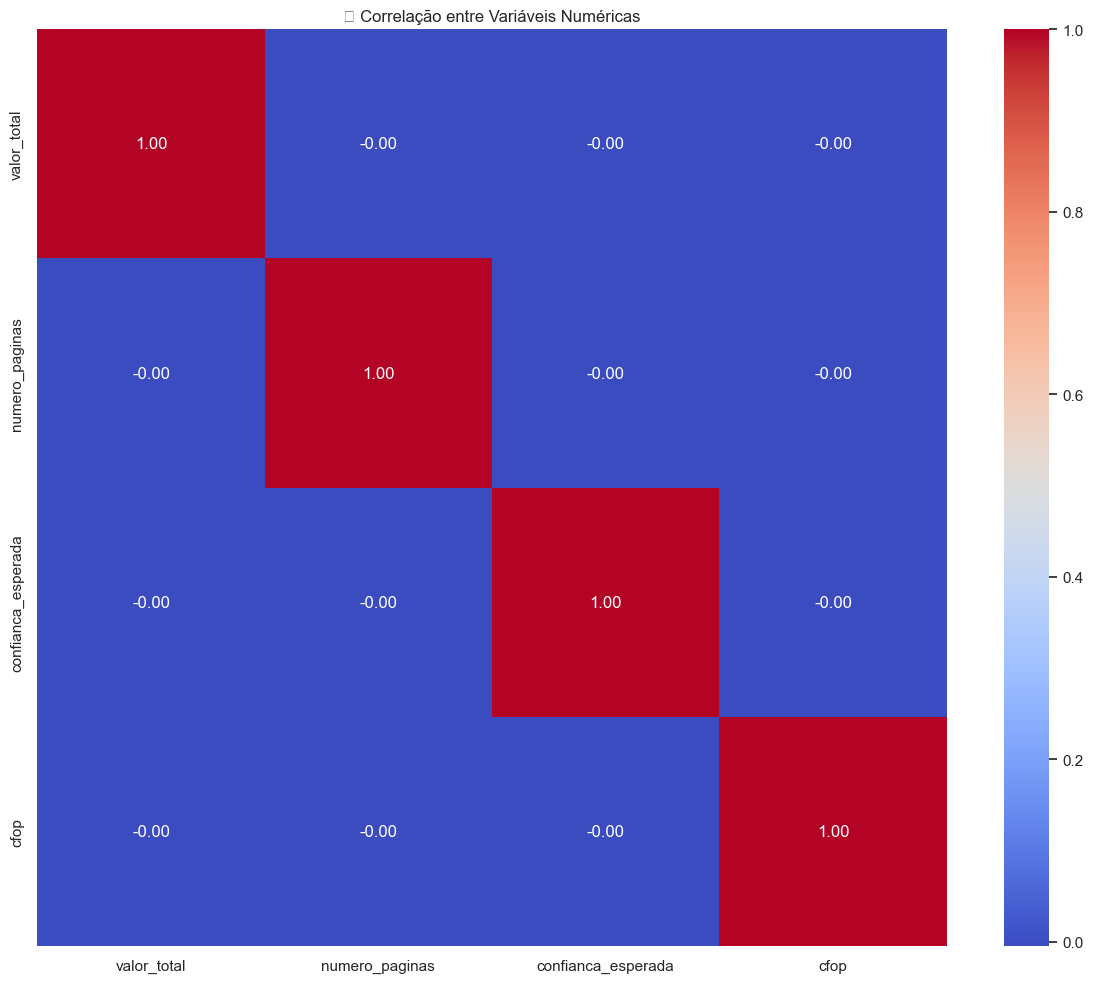

In [25]:
num_cols = df_anon.select_dtypes(include=["float", "int"]).columns
if len(num_cols) >= 2:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_anon[num_cols].corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("🔗 Correlação entre Variáveis Numéricas")
    plt.tight_layout()
    plt.show()

In [26]:
if "classe" in df_anon.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x="classe", data=df_anon)
    plt.title("📌 Distribuição das Classes")
    plt.tight_layout()
    plt.show()


C:\Users\guera\AppData\Local\Temp\ipykernel_9428\2071424302.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\guera\Documentos\agente-financeiro\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


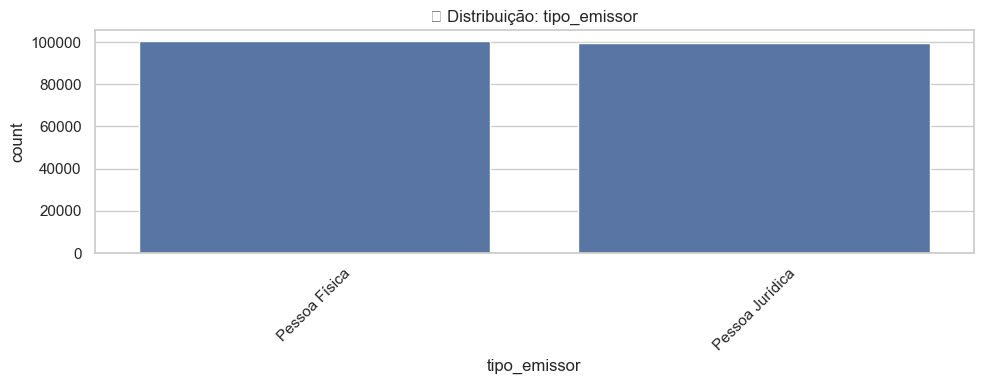

C:\Users\guera\AppData\Local\Temp\ipykernel_9428\2071424302.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\guera\Documentos\agente-financeiro\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


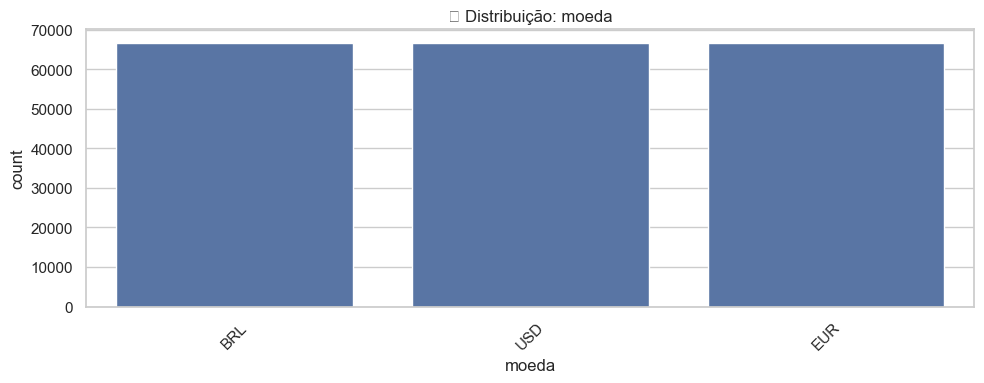

C:\Users\guera\AppData\Local\Temp\ipykernel_9428\2071424302.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\guera\Documentos\agente-financeiro\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


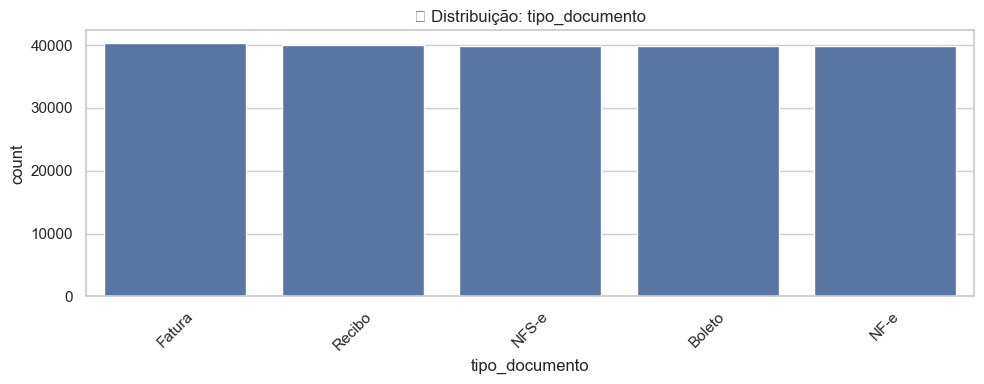

C:\Users\guera\AppData\Local\Temp\ipykernel_9428\2071424302.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\guera\Documentos\agente-financeiro\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


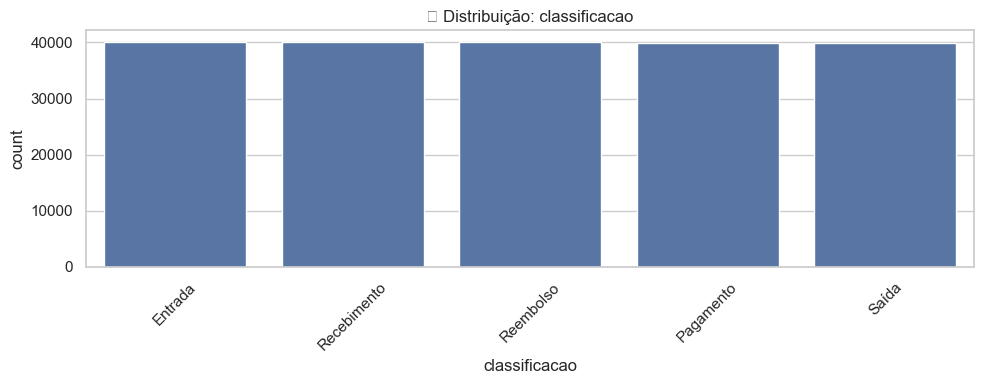

C:\Users\guera\AppData\Local\Temp\ipykernel_9428\2071424302.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\guera\Documentos\agente-financeiro\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


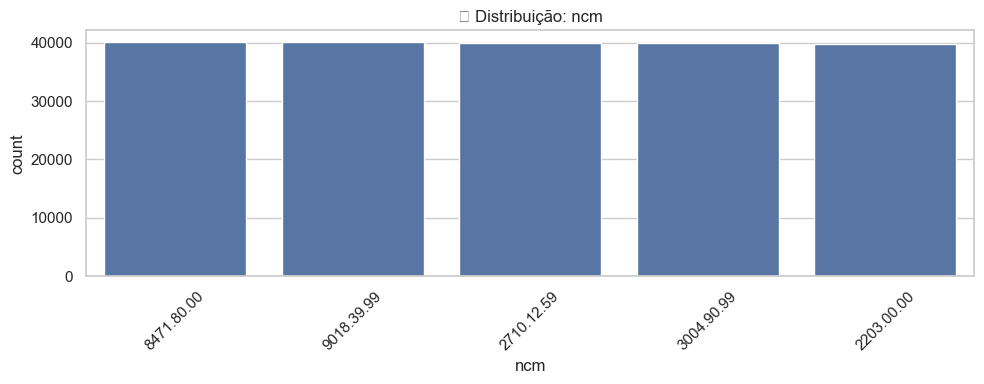

In [27]:
cat_cols = df_anon.select_dtypes(include=["object"]).nunique().sort_values(ascending=True)
cat_cols = cat_cols[cat_cols.between(2, 20)].head(5).index.tolist()

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=df_anon, order=df_anon[col].value_counts().index)
    plt.title(f"📊 Distribuição: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()